In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB

In [2]:
train_size = 100
population_size = train_size + 40
population_config = {
    'n_samples': population_size,
    'class_sep': 0.2,
    'n_classes': 2,
    'n_features': 3,
    'n_informative': 2,
    'n_redundant': 0,
    'n_repeated': 0,
}
random_state = 42
np.random.seed(random_state)
num_wrong_predictions = 5

In [3]:
output_dir = 'plots_teoria'

In [4]:
X, y = make_classification(
    **population_config,
    weights=None,
    random_state=random_state,
)

In [5]:
prev_test = 0.9

X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]
idx_positives_test = np.argwhere(y_test==1).flatten()
idx_negatives_test = np.random.choice(
    np.argwhere(y_test==0).flatten(),
    size=round((1-prev_test)*len(idx_positives_test)/prev_test),
    replace=False,
)
idx_test = np.concatenate([idx_positives_test, idx_negatives_test])
X_test = X_test[idx_test]
y_test = y_test[idx_test]

In [6]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [7]:
y_predict_train = model.predict(X_train)
positive_predictions_train = (y_predict_train==1)

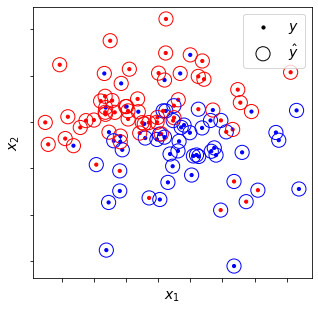

In [8]:
f, ax = plt.subplots(1)
f.set_size_inches(5, 5)
fontsize = 14

ground_truth_colors_train = np.where(y_train, 'r', 'b')
ground_truth_points_train = ax.scatter(
    x=X_train[:, 0],
    y=X_train[:, 1],
    s=40,
    c=ground_truth_colors_train,
    marker='.',
)
prediction_colors_test = np.where(y_predict_train, 'r', 'b')
prediction_circles_test = ax.scatter(
    x=X_train[:, 0],
    y=X_train[:, 1],
    s=200,
    marker='o',
    facecolors='None',
    edgecolors=prediction_colors_test,
)
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.xlabel(r'$x_{1}$', fontsize=fontsize)
plt.ylabel(r'$x_{2}$', fontsize=fontsize)
ax.legend(
    [ground_truth_points_train, prediction_circles_test],
    [r'$y$', r'$\hat y$'],
    loc='best',
    fontsize=fontsize,
)
leg = ax.get_legend()
leg.legendHandles[0].set_color('black')
leg.legendHandles[1].set_edgecolor('black')
plt.savefig(f'{output_dir}/intro_scatterplot.png')
plt.show()

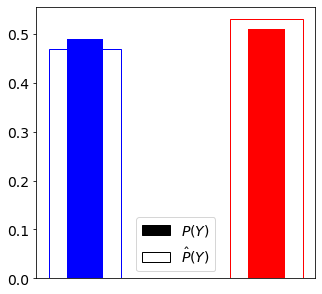

In [9]:
f, ax = plt.subplots(1)
f.set_size_inches(5, 5)
fontsize = 14

unique, y_train_counts = np.unique(y_train, return_counts=True)
_, y_train_predict_counts = np.unique(y_predict_train, return_counts=True)

ax.xaxis.set_visible(False)
colors = ['blue', 'red']
ground_truth_bar = ax.bar(
    unique,
    y_train_counts/len(y_train),
    color=colors,
    width=0.2,
)
predictions_bar = ax.bar(
    unique,
    y_train_predict_counts/len(y_train),
    edgecolor=colors,
    width=0.4, 
    fill=False,
)
ax.legend(
    [ground_truth_bar, predictions_bar],
    [r'$P(Y)$', r'$\hat P(Y)$'],
    fontsize=fontsize,
    loc='best',
)
leg = ax.get_legend()
leg.legendHandles[0].set_color('black')
leg.legendHandles[1].set_edgecolor('black')
plt.yticks(fontsize=fontsize)
plt.savefig(f'{output_dir}/intro_barplot.png')
plt.show()

In [10]:
y_predict_test = model.predict(X_test)
positive_predictions_test = (y_predict_test==1)

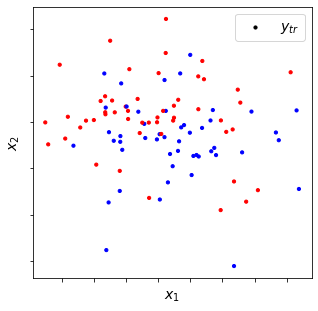

In [11]:
f, ax = plt.subplots(1)
f.set_size_inches(5, 5)
fontsize = 14

ground_truth_colors_train = np.where(y_train, 'r', 'b')
ground_truth_points_train = ax.scatter(
    x=X_train[:, 0],
    y=X_train[:, 1],
    s=40,
    c=ground_truth_colors_train,
    marker='.',
)
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.xlabel(r'$x_{1}$', fontsize=fontsize)
plt.ylabel(r'$x_{2}$', fontsize=fontsize)
ax.legend(
    [ground_truth_points_train],
    [r'$y_{tr}$'],
    loc='best',
    fontsize=fontsize,
)
leg = ax.get_legend()
leg.legendHandles[0].set_color('black')
plt.savefig(f'{output_dir}/cambios_train_scatterplot.png')
plt.show()

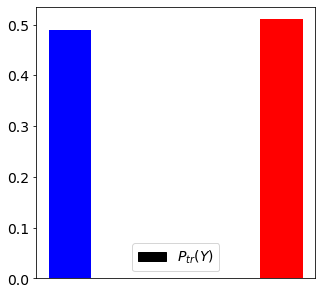

In [12]:
f, ax = plt.subplots(1)
f.set_size_inches(5, 5)
fontsize = 14

unique, y_counts_train = np.unique(y_train, return_counts=True)

ax.xaxis.set_visible(False)
colors = ['blue', 'red']
ground_truth_bar = ax.bar(
    unique,
    y_counts_train/len(y_train),
    color=colors,
    width=0.2,
)
ax.legend(
    [ground_truth_bar],
    [r'$P_{tr}(Y)$'],
    loc='best',
    fontsize=fontsize,
)
leg = ax.get_legend()
leg.legendHandles[0].set_color('black')
plt.yticks(fontsize=fontsize)
plt.savefig(f'{output_dir}/cambios_train_barplot.png')
plt.show()

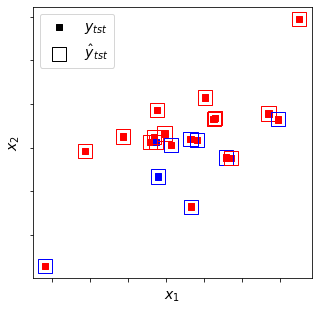

In [13]:
f, ax = plt.subplots(1)
f.set_size_inches(5, 5)
fontsize = 14

ground_truth_colors_test = np.where(y_test, 'r', 'b')
ground_truth_points_test = ax.scatter(
    x=X_test[:, 0],
    y=X_test[:, 1],
    s=40,
    c=ground_truth_colors_test,
    marker='s',
)
prediction_colors_test = np.where(y_predict_test, 'r', 'b')
predictions_squares_test = ax.scatter(
    x=X_test[:, 0],
    y=X_test[:, 1],
    s=200,
    marker='s',
    facecolors='None',
    edgecolors=prediction_colors_test,
)
ax.set_yticklabels([])
ax.set_xticklabels([])
plt.xlabel(r'$x_{1}$', fontsize=fontsize)
plt.ylabel(r'$x_{2}$', fontsize=fontsize)
ax.legend(
    [ground_truth_points_test, predictions_squares_test],
    [r'$y_{tst}$', r'$\hat y_{tst}$'],
    loc='best',
    fontsize=fontsize,
)
leg = ax.get_legend()
leg.legendHandles[0].set_color('black')
leg.legendHandles[1].set_edgecolor('black')
plt.savefig(f'{output_dir}/cambios_test_scatterplot.png')
plt.show()

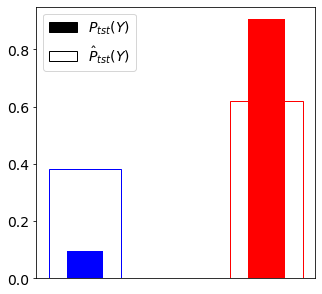

In [14]:
f, ax = plt.subplots(1)
f.set_size_inches(5, 5)
fontsize = 14

_, y_counts_test = np.unique(y_test, return_counts=True)
_, y_counts_predict_test = np.unique(y_predict_test, return_counts=True)

ax.xaxis.set_visible(False)
colors = ['blue', 'red']
ground_truth_bar = ax.bar(
    unique,
    y_counts_test/len(y_test),
    color=colors,
    width=0.2,
)
predictions_bar = ax.bar(
    unique,
    y_counts_predict_test/len(y_test),
    edgecolor=colors,
    width=0.4, 
    fill=False,
)
ax.legend(
    [ground_truth_bar, predictions_bar],
    [r'$P_{tst}(Y)$', r'$\hat P_{tst}(Y)$'],
    loc='best',
    fontsize=fontsize,
)
leg = ax.get_legend()
leg.legendHandles[0].set_color('black')
leg.legendHandles[1].set_edgecolor('black')
plt.yticks(fontsize=fontsize)
plt.savefig(f'{output_dir}/cambios_test_barplot.png')
plt.show()